<a href="https://colab.research.google.com/github/rajagupta3605/ResNet_ImageClassification/blob/main/ResNet_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

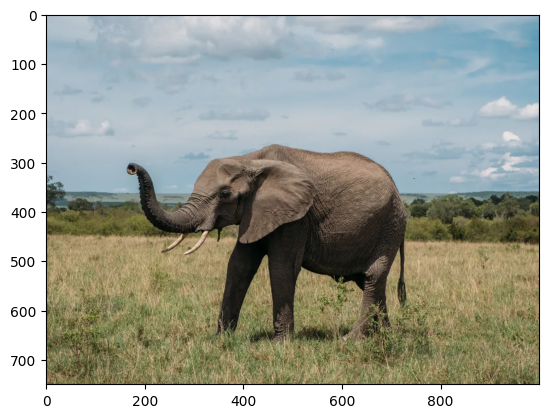

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/drive/MyDrive/Colab Notebooks/ResNet/ResNet_ImageClassification/elephant.webp.webp")
plt.imshow(image)

In [2]:
from torchvision import transforms

Transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

In [3]:
Transformed_image = Transform(image)

In [4]:
print(Transformed_image.shape)

torch.Size([3, 224, 224])


In [5]:
import torch
inputImag_batched = torch.unsqueeze(Transformed_image,0)


In [6]:
print(inputImag_batched.shape)

torch.Size([1, 3, 224, 224])


In [7]:
from torchvision import models
resnet = models.resnet50(pretrained = True)
resnet.eval()
output = resnet(inputImag_batched)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 146MB/s]


In [13]:
with open("/content/drive/MyDrive/Colab Notebooks/ResNet/ResNet_ImageClassification/imagenet_metadata.txt") as classfile:
  imageNetClass = [line.strip() for line in classfile]


['n00004475\torganism, being', 'n00005787\tbenthos', 'n00006024\theterotroph', 'n00006484\tcell', 'n00007846\tperson, individual, someone, somebody, mortal, soul', 'n00015388\tanimal, animate being, beast, brute, creature, fauna', 'n00017222\tplant, flora, plant life', 'n00021265\tfood, nutrient', 'n00021939\tartifact, artefact', 'n00120010\thop', 'n00141669\tcheck-in', 'n00288000\tdressage', 'n00288190\tcurvet, vaulting', 'n00288384\tpiaffe', 'n00324978\tfunambulism, tightrope walking', 'n00326094\trock climbing', 'n00433458\tcontact sport', 'n00433661\toutdoor sport, field sport', 'n00433802\tgymnastics, gymnastic exercise', 'n00434075\tacrobatics, tumbling', 'n00439826\ttrack and field', 'n00440039\ttrack, running', 'n00440218\tjumping', 'n00440382\tbroad jump, long jump', 'n00440509\thigh jump', 'n00440643\tFosbury flop', 'n00440747\tskiing', 'n00440941\tcross-country skiing', 'n00441073\tski jumping', 'n00441824\twater sport, aquatics', 'n00442115\tswimming, swim', 'n00442437\tbat

In [10]:
irg, predicted = torch.max(output, 1)
percentage = torch.softmax(output, dim=1)[0] * 100
print(imageNetClass[predicted[0]], percentage[predicted[0]].item())

n01449712	platy, Platypoecilus maculatus 81.50052642822266
